In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-phone-price/Mobile phone price.csv


In [3]:
df = pd.read_csv("../input/mobile-phone-price/Mobile phone price.csv" , sep = ",")
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
df.shape

(407, 8)

## EDA (Exploratory Data Analysis)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


- Most of the data is categorical while the rest are numerical

In [6]:
df_categorical= df.select_dtypes(include='object')
df_categorical.nunique()

Brand                    16
Model                   239
Storage                  13
RAM                      20
Screen Size (inches)     41
Camera (MP)             143
Price ($)                89
dtype: int64

In [7]:
for col in df.columns:
    new_col_name = col.strip() 
    df.rename(columns={col: new_col_name}, inplace=True)

**Handling Missing Values**

In [8]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

**Handling Duplicate values**

In [9]:
df.duplicated().sum()

26

<Axes: xlabel='Price ($)', ylabel='Density'>

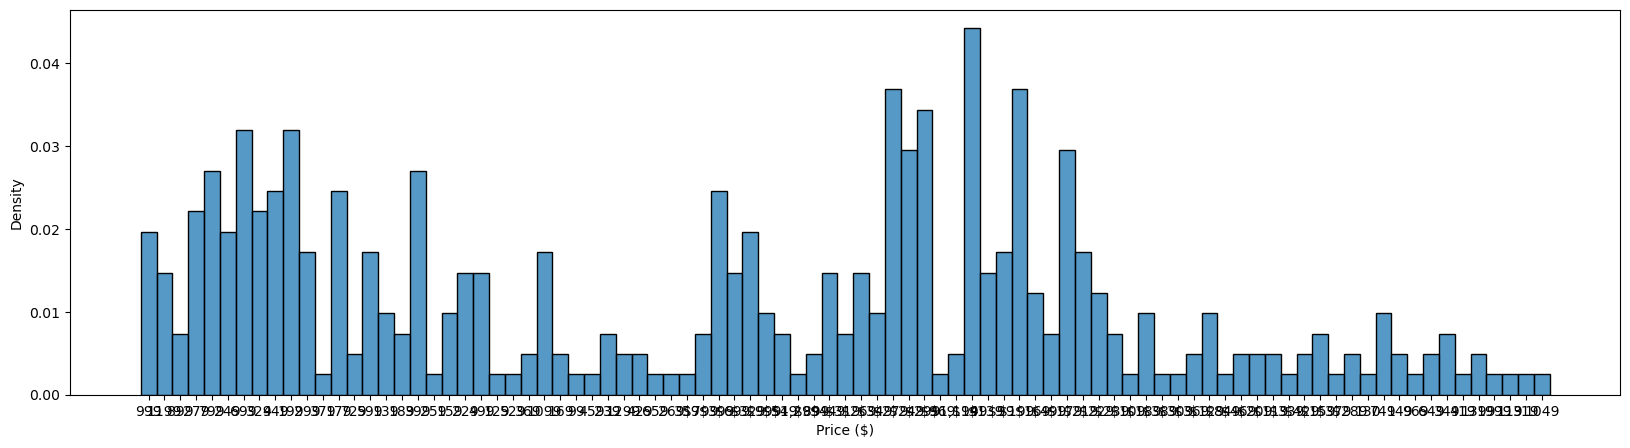

In [10]:
plt.figure(figsize=(20, 5))
sns.histplot(df['Price ($)'],label='with duplicate data',stat='density')


In [11]:
df= df.drop_duplicates()

<Axes: xlabel='Price ($)', ylabel='Density'>

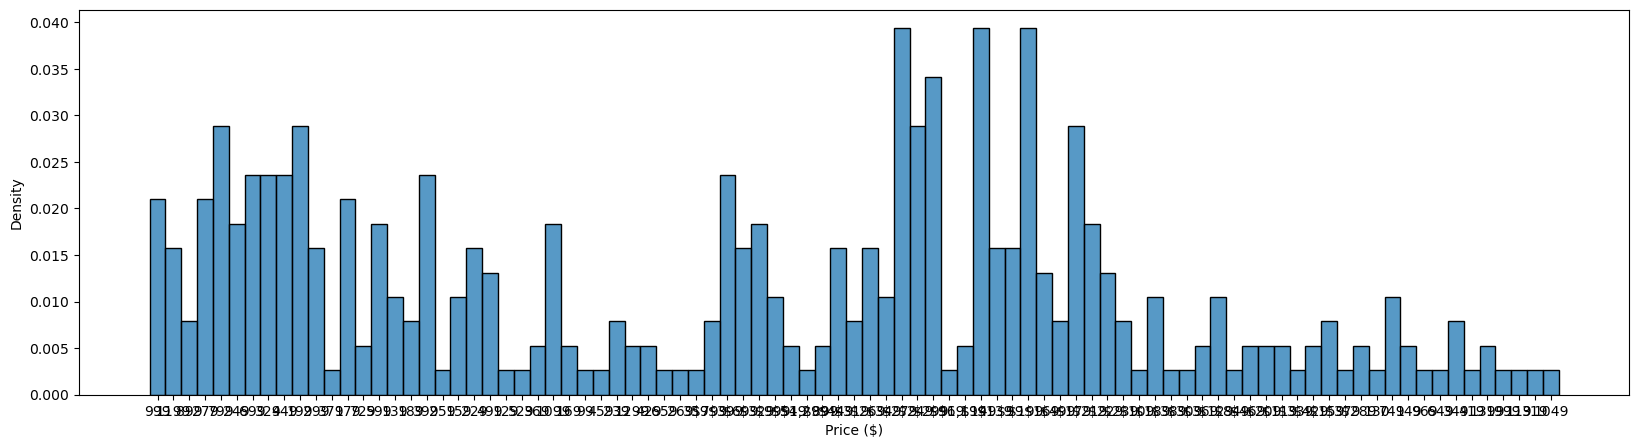

In [12]:
plt.figure(figsize=(20, 5))
sns.histplot(data=df,x='Price ($)',label='without duplicate data',stat='density')

**Binning categorical variables**

In [13]:
df['Camera (MP)'].value_counts()

13MP + 2MP + 2MP          28
48MP + 8MP + 2MP + 2MP    15
64MP + 8MP + 2MP          11
48+8+2+2                  10
48MP + 8MP + 2MP           9
                          ..
64 + 12 + 8 + 5            1
48MP + 8MP + 5MP + 2MP     1
13MP                       1
64 + 2                     1
48+13+8+2                  1
Name: Camera (MP), Length: 143, dtype: int64

In [14]:
df['Camera (MP)'] = df['Camera (MP)'].str.replace('MP', '')

In [15]:
df['Camera (MP)'].value_counts()

13 + 2 + 2          37
48 + 8 + 2 + 2      22
50 + 2 + 2          13
64 + 8 + 2          13
48 + 2 + 2          12
                    ..
64 + 13 + 12         1
13+8+5+2             1
50 + 50 + 13 + 3     1
48+5+2               1
48+13+8+2            1
Name: Camera (MP), Length: 116, dtype: int64

In [16]:
import re
for index, row in df.iterrows():
    camera_values = re.findall(r'\d+', row['Camera (MP)']) 
    summation = sum(map(int, camera_values))
    df.at[index, 'Camera (MP)'] = summation 

In [17]:
df['Camera (MP)']

0       36
1      140
2      108
3       79
4       64
      ... 
401     58
402     88
403     60
404     36
405     71
Name: Camera (MP), Length: 381, dtype: object

In [18]:
df['Camera (MP)'] = df['Camera (MP)'].astype(int)
df['Camera (MP)']

0       36
1      140
2      108
3       79
4       64
      ... 
401     58
402     88
403     60
404     36
405     71
Name: Camera (MP), Length: 381, dtype: int64

In [19]:
for index, row in df.iterrows():
    camera_values = re.findall(r'\d+', row['Screen Size (inches)']) 
    summation = sum(map(float, camera_values))
    df.at[index, 'Screen Size (inches)'] = summation 

In [20]:
df['Screen Size (inches)']

0       7.0
1      14.0
2      13.0
3      73.0
4      10.0
       ... 
401    21.0
402    13.0
403    63.0
404    13.0
405    10.0
Name: Screen Size (inches), Length: 381, dtype: object

In [21]:
df['Screen Size (inches)'] = df['Screen Size (inches)'].astype(float)
df['Screen Size (inches)']

0       7.0
1      14.0
2      13.0
3      73.0
4      10.0
       ... 
401    21.0
402    13.0
403    63.0
404    13.0
405    10.0
Name: Screen Size (inches), Length: 381, dtype: float64

In [22]:
df['Storage'] = df['Storage'].str.replace('GB', '')
df['RAM'] = df['RAM'].str.replace('GB', '')

In [23]:
df['Storage']= df['Storage'].astype(int)
df['Storage']

0      128
1      256
2      128
3      128
4      128
      ... 
401    128
402    128
403    128
404    128
405    128
Name: Storage, Length: 381, dtype: int64

In [24]:
df['RAM']= df['RAM'].astype(int)
df['RAM']

0       6
1      12
2       8
3       6
4       8
       ..
401     4
402     8
403     6
404     6
405     8
Name: RAM, Length: 381, dtype: int64

In [25]:
df['Price ($)'].value_counts()

$279       15
$199       15
$149       15
$299       13
$179       11
           ..
459         1
$849        1
99          1
$1,299      1
1049        1
Name: Price ($), Length: 89, dtype: int64

In [26]:
df['Price ($)'] = df['Price ($)'].str.replace('$', '')
df['Price ($)'] = df['Price ($)'].str.replace(',', '')
df['Price ($)'].unique()

/tmp/ipykernel_20/2667241690.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price ($)'] = df['Price ($)'].str.replace('$', '')


array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '799 ',
       '399 ', '699 ', '329 ', '999 ', '549 ', '1299 ', '899 ', '449 ',
       '319 ', '269 ', '349 ', '279 ', '249 ', '299 ', '969 ', '1199 ',
       '149 ', '139 ', '99 ', '199 ', '169 ', '499 ', '179 ', '219 ',
       '229 ', '239 ', '109 ', '189 ', '389 ', '309 ', '369 ', '129 ',
       '849 ', '469 ', '209 ', '119 ', '339 ', '429 ', '159 ', '379 ',
       '289 ', '130', '749', '149', '969', '649', '349', '419', '1399',
       '1999', '119', '319', '1049'], dtype=object)

In [27]:
df['Price ($)']= df['Price ($)'].astype(int)
df['Price ($)']

0       999
1      1199
2       899
3       279
4       799
       ... 
401     329
402    1049
403     349
404    1099
405     429
Name: Price ($), Length: 381, dtype: int64

## Business questions

## What is the distribution of the price?

In [28]:
df['Brand'].value_counts()

Samsung       73
Xiaomi        62
Oppo          53
Realme        43
Vivo          33
Apple         28
Nokia         24
Motorola      22
OnePlus       14
Huawei        12
Google         5
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: Brand, dtype: int64

- Since we have more than 5 unique brands we will need to divide each 5 groups and visualize their densities against each other 

In [29]:
brand_5=df['Brand'].value_counts().head(5)
brand2_5=df['Brand'].value_counts()[5:10]
brand3_5=df['Brand'].value_counts().tail(5)
brand_5.index

Index(['Samsung', 'Xiaomi', 'Oppo', 'Realme', 'Vivo'], dtype='object')

In [30]:
brand2_5= df[df['Brand'].isin(brand2_5.index)]
brand3_5= df[df['Brand'].isin(brand3_5.index)]

In [31]:
brand_5= df[df['Brand'].isin(brand_5.index)]
brand_5

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
1,Samsung,Galaxy S21 Ultra,256,12,14.0,140,5000,1199
3,Xiaomi,Redmi Note 10 Pro,128,6,73.0,79,5020,279
6,Samsung,Galaxy Z Flip3,256,8,13.0,24,3300,999
7,Xiaomi,Poco X3 Pro,128,6,73.0,60,5160,249
8,Oppo,Reno6 Pro+ 5G,128,8,61.0,81,4500,699
...,...,...,...,...,...,...,...,...
397,Xiaomi,Poco M3,128,4,59.0,52,6000,149
399,Oppo,A93,128,8,49.0,60,4000,319
402,Samsung,Galaxy Note20 5G,128,8,13.0,88,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,63.0,60,4160,349


<Axes: xlabel='Price ($)', ylabel='Density'>

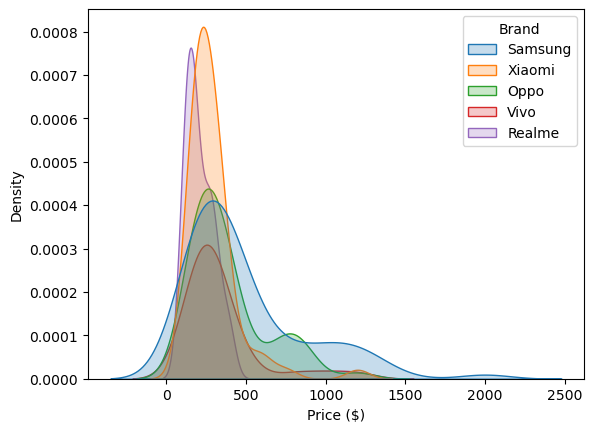

In [32]:
sns.kdeplot(data=brand_5,x='Price ($)',hue='Brand',fill=True)

- Samsung is the first most frequently sold phone while vivo is the least frequently sold from the top 5 most frequently sold phones.However, prices that range from 0 to 500 are mainly sold from Xiaomi

<Axes: xlabel='Price ($)', ylabel='Density'>

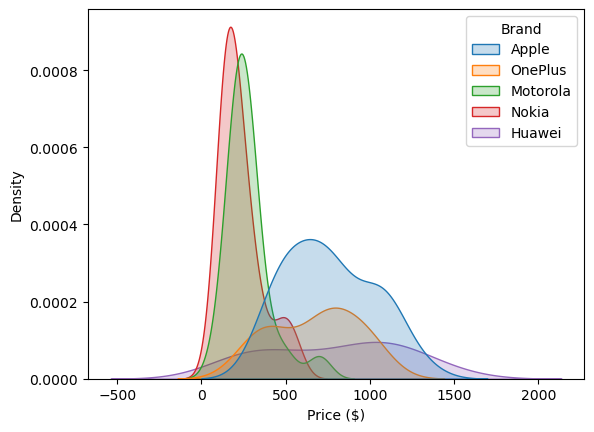

In [33]:
sns.kdeplot(data=brand2_5,x='Price ($)',hue='Brand',fill=True)

- From the second group Apple is the most frequently sold.However, prices that range from 0 to 500 are mainly sold from Nokia

/tmp/ipykernel_20/2337766941.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=brand3_5,x='Price ($)',hue='Brand',fill=True)
/tmp/ipykernel_20/2337766941.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=brand3_5,x='Price ($)',hue='Brand',fill=True)


<Axes: xlabel='Price ($)', ylabel='Density'>

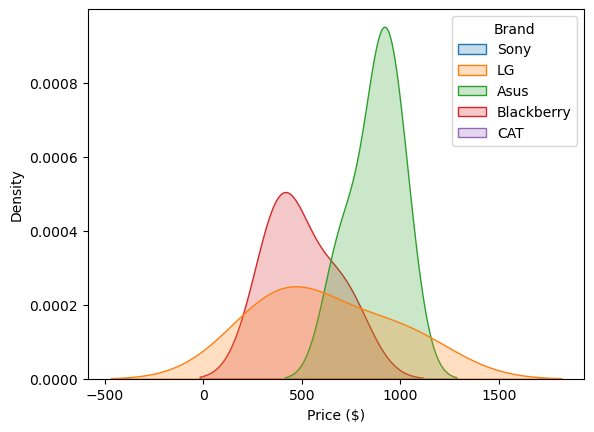

In [34]:
sns.kdeplot(data=brand3_5,x='Price ($)',hue='Brand',fill=True)

- From the last group Asus is the most frequently sold

## Which brand corresponds to the highest sales

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'Samsung'),
  Text(2, 0, 'OnePlus'),
  Text(3, 0, 'Xiaomi'),
  Text(4, 0, 'Google'),
  Text(5, 0, 'Oppo'),
  Text(6, 0, 'Vivo'),
  Text(7, 0, 'Realme'),
  Text(8, 0, 'Motorola'),
  Text(9, 0, 'Nokia'),
  Text(10, 0, 'Sony'),
  Text(11, 0, 'LG'),
  Text(12, 0, 'Asus'),
  Text(13, 0, 'Blackberry'),
  Text(14, 0, 'CAT'),
  Text(15, 0, 'Huawei')])

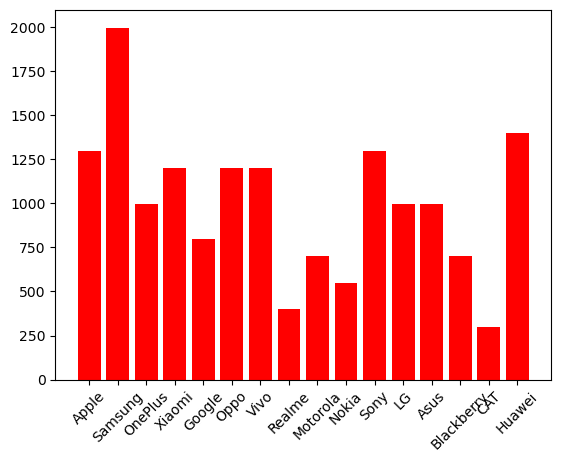

In [35]:
plt.bar(df['Brand'],df['Price ($)'], color='r')
plt.xticks(rotation=45)

- Samsung Contributes to the highest sales.however, it is not frequently sold

## Which brand is the most frequently sold

<Axes: >

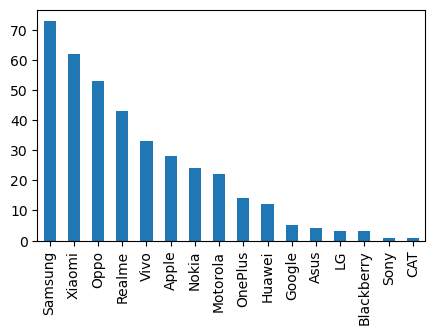

In [36]:
(df['Brand'].value_counts()).plot(kind='bar', stacked=True, figsize=(5, 3))

- Samsung is the most frequently sold brand while CAT is the least frequently sold

## What is the median price of phones for each brand

In [37]:
import plotly.express as px

In [38]:
px.box(df, y='Price ($)', color='Brand')

- The highest median price is from Huawei and also the maximum price, while the lowest prices came from Realme, Motorola, Nokia

**Handling outliers**

Storage                      Axes(0.125,0.712609;0.168478x0.167391)
RAM                       Axes(0.327174,0.712609;0.168478x0.167391)
Screen Size (inches)      Axes(0.529348,0.712609;0.168478x0.167391)
Camera (MP)               Axes(0.731522,0.712609;0.168478x0.167391)
Battery Capacity (mAh)       Axes(0.125,0.511739;0.168478x0.167391)
Price ($)                 Axes(0.327174,0.511739;0.168478x0.167391)
dtype: object

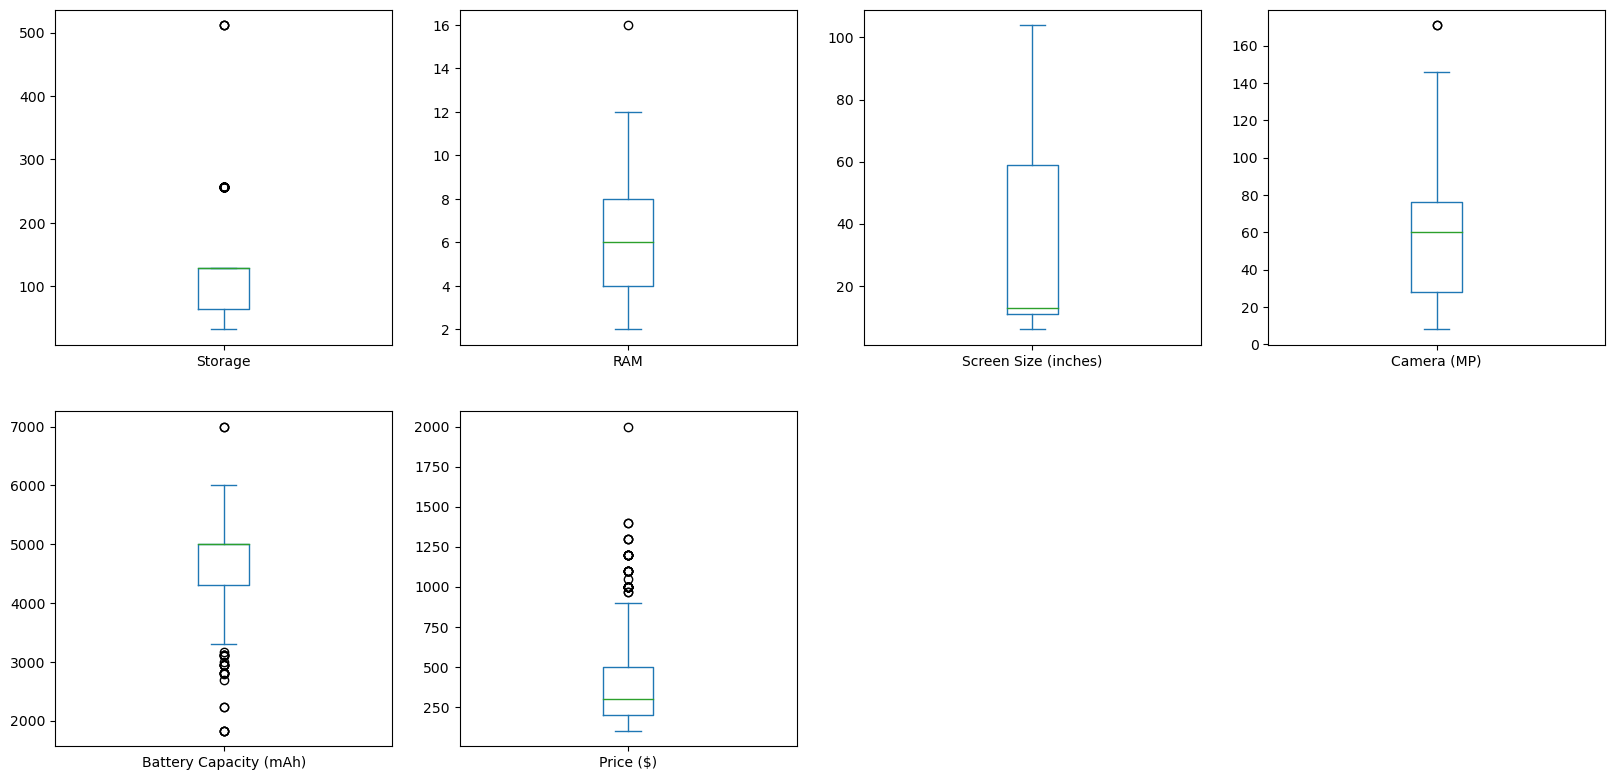

In [39]:
df.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (4,4))

Text(0, 0.5, 'Price')

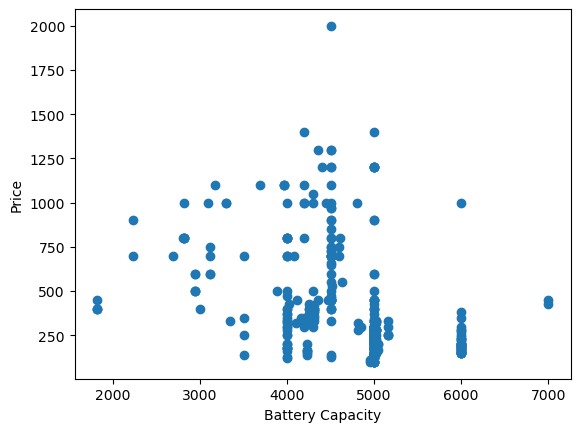

In [40]:
plt.scatter(df['Battery Capacity (mAh)'],df['Price ($)'])
plt.xlabel('Battery Capacity')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

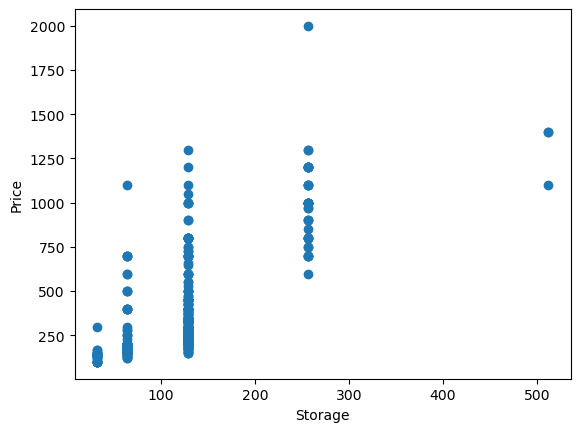

In [41]:
plt.scatter(df['Storage'],df['Price ($)'])
plt.xlabel('Storage')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

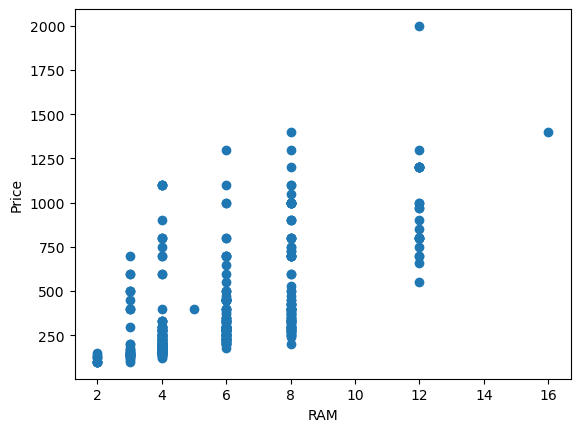

In [42]:
plt.scatter(df['RAM'],df['Price ($)'])
plt.xlabel('RAM')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

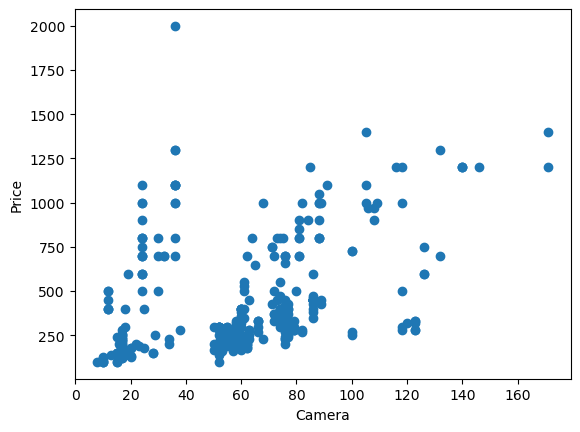

In [43]:
plt.scatter(df['Camera (MP)'],df['Price ($)'])
plt.xlabel('Camera')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

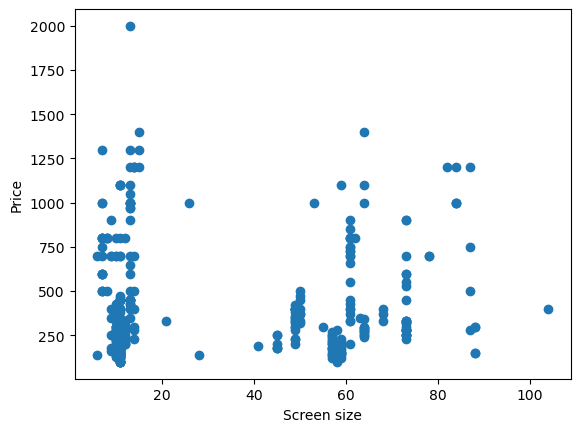

In [44]:
plt.scatter(df['Screen Size (inches)'],df['Price ($)'])
plt.xlabel('Screen size')
plt.ylabel('Price')

**Calculating Correlations**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 405
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   381 non-null    object 
 1   Model                   381 non-null    object 
 2   Storage                 381 non-null    int64  
 3   RAM                     381 non-null    int64  
 4   Screen Size (inches)    381 non-null    float64
 5   Camera (MP)             381 non-null    int64  
 6   Battery Capacity (mAh)  381 non-null    int64  
 7   Price ($)               381 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.9+ KB


In [46]:
df_numerical = df.drop(['Brand','Model'],axis=1)

In [47]:
df_numerical.corr()

,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
Storage,1.000000,0.688187,0.141897,0.563886,-0.089745,0.716649
RAM,0.688187,1.000000,0.254239,0.686087,-0.032484,0.637373
Screen Size (inches),0.141897,0.254239,1.000000,0.184665,0.105827,0.004833
Camera (MP),0.563886,0.686087,0.184665,1.000000,0.186165,0.427763
Battery Capacity (mAh),-0.089745,-0.032484,0.105827,0.186165,1.000000,-0.396162
Price ($),0.716649,0.637373,0.004833,0.427763,-0.396162,1.000000


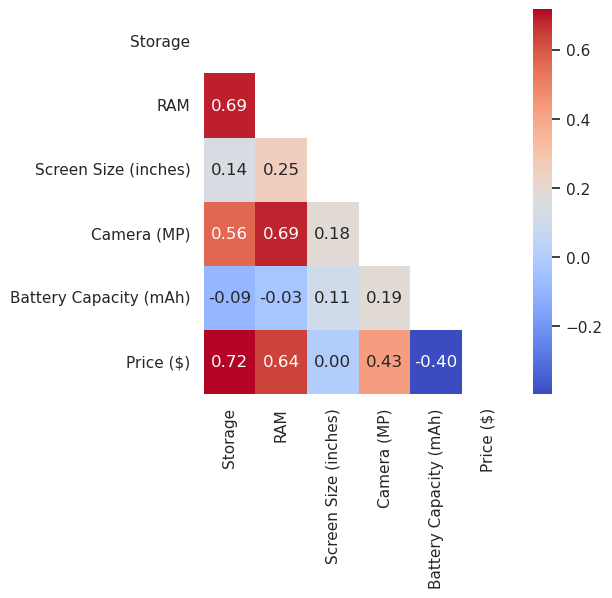

In [48]:
plt.figure(figsize=(5, 5))
sns.set(style="white") 

mask = np.triu(df_numerical.corr()) 
sns.heatmap(data=df_numerical.corr(), annot=True, fmt=".2f", cmap='coolwarm', mask=mask)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



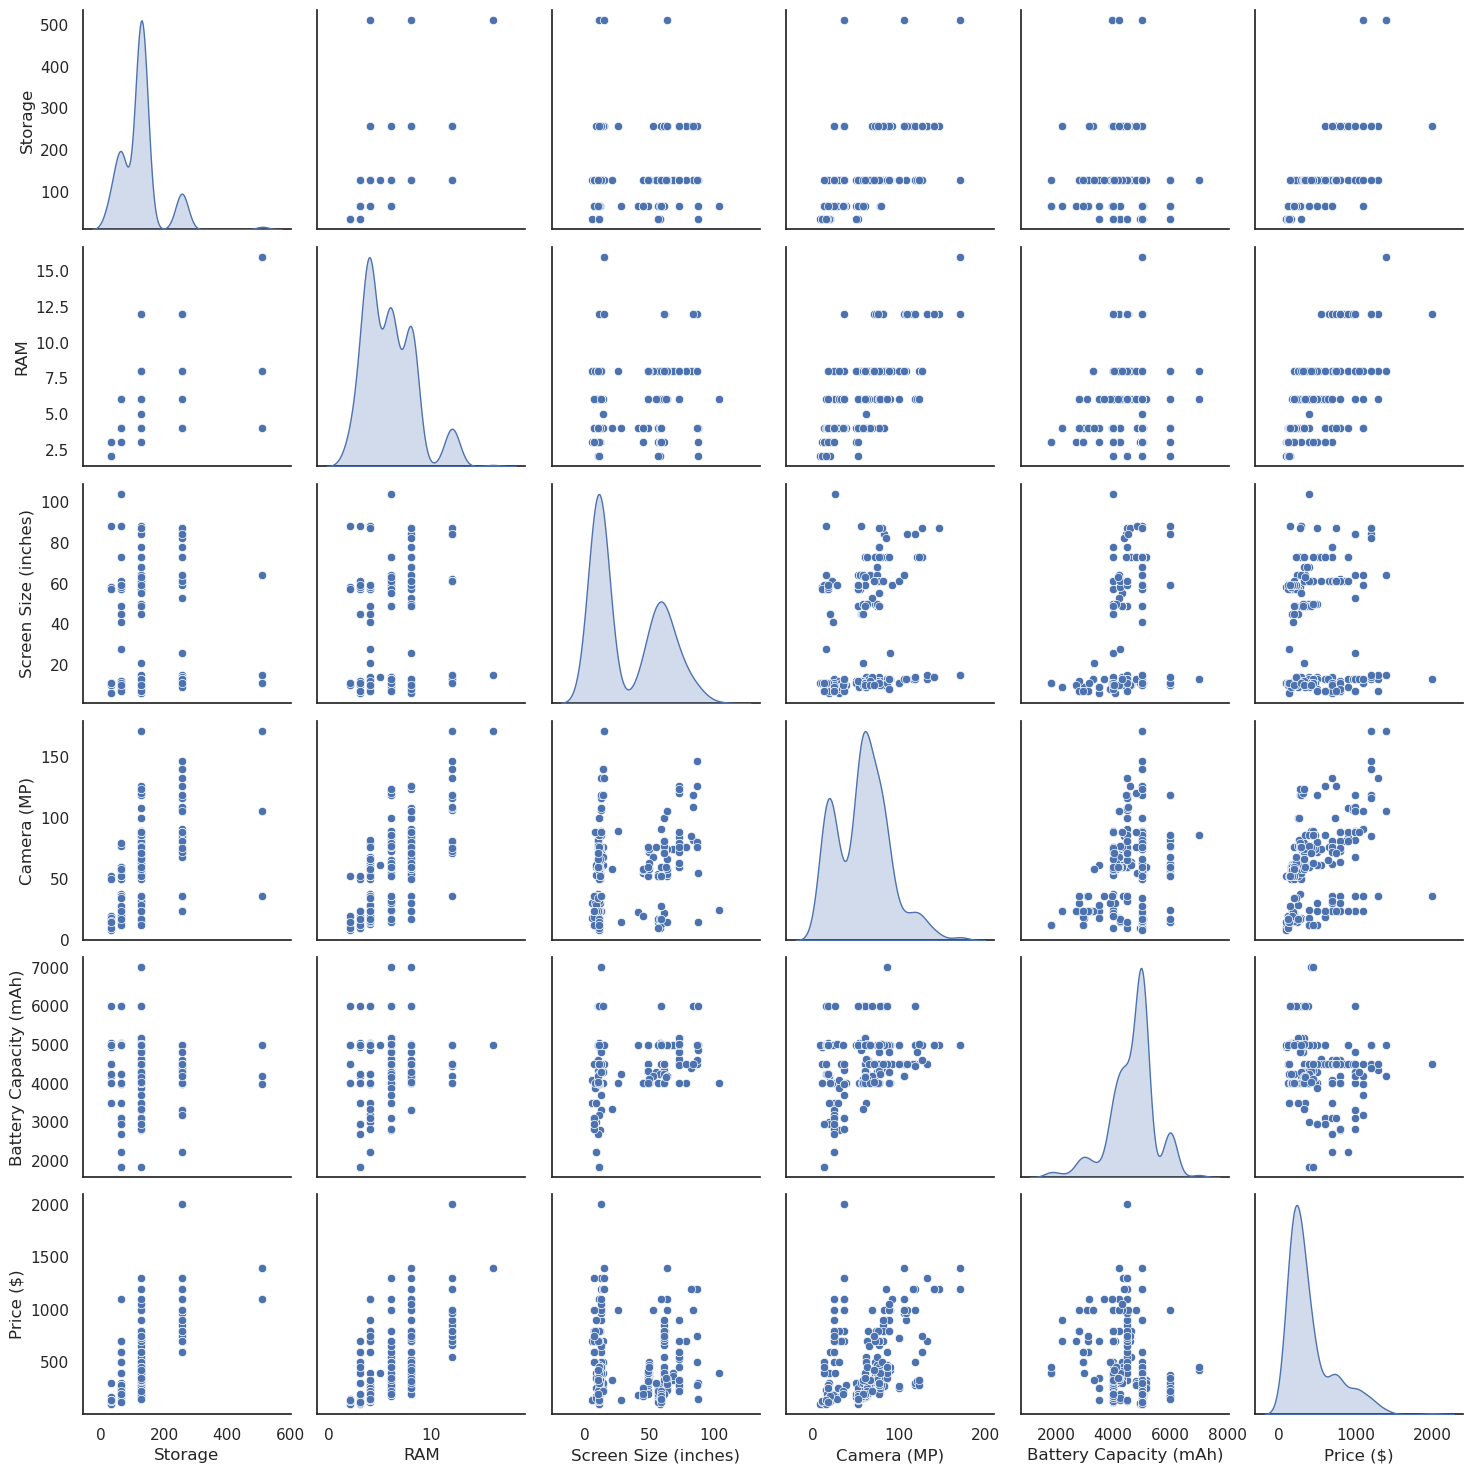

In [49]:
sns.pairplot(df_numerical, diag_kind='kde')

**Label encoding categorical variables with small number of unique values**

In [50]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
df['Brand']= label_encoder.fit_transform(df['Brand'])

**Dropping the least important columns**

In [51]:
df.drop(['Model'],axis=1,inplace = True)

In [52]:
df.drop(['Screen Size (inches)'],axis=1,inplace = True)

## VIF Test

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [54]:
X = df.drop(columns=['Price ($)']) 

vif_data = pd.DataFrame()
vif_data["Price ($)"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Price ($),VIF
0,Brand,11.392095
1,Storage,9.501065
2,RAM,16.039744
3,Camera (MP),9.275529
4,Battery Capacity (mAh),14.507949


## Train - Test Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x = df.drop(["Price ($)"] , axis = 1).values
y = df["Price ($)"].values

In [57]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

## Data Scaling using Robust Scaler 

<Axes: xlabel='Price ($)', ylabel='Density'>

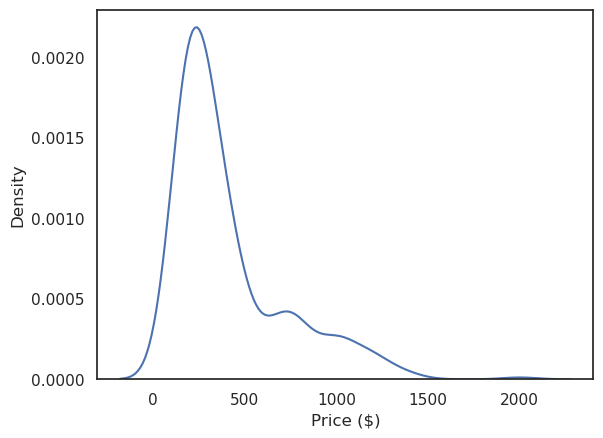

In [58]:
sns.kdeplot(df['Price ($)'])

In [59]:
from sklearn.preprocessing import RobustScaler, StandardScaler , MinMaxScaler

In [60]:
ro_scaler = StandardScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lin = LinearRegression()

In [63]:
lin.fit(x_train,y_train)

LinearRegression()

In [64]:
lin.score(x_train,y_train)

0.7234340988676258

In [65]:
lin.score(x_test , y_test)

0.7379117089350674

In [66]:
y_pred = lin.predict(x_test)
y_pred

array([ 191.99966119,  410.70269742,  276.05061631,  126.60270851,
        410.70269742,  440.94189571,   68.85674647,  331.07648289,
        193.17914399,  425.78292364,  930.74548932,   47.17851446,
        -50.10849188,  436.54988309,  622.69464724,  259.90129331,
       1016.58616526,  408.62016125,  167.59353067,  475.66342559,
        337.95508143,  358.38493164,  358.38493164,  180.08947411,
       1048.39612798,  -20.77767305,  728.86917681,  -63.69166423,
        -14.6122703 ,  485.16031659,  374.31410197,  954.93758027,
        553.92582788,  408.62016125,  298.25867323,  468.15505614,
        290.61877999,  127.78219131,   51.67014044,  373.67342665,
        400.61210835,  627.79293885,  274.76357745,  211.36995724,
        402.39538391,  198.47901354,  543.1852356 ,  394.95505094,
        915.07193257,  373.27175013,  259.90129331,   49.90091624,
        585.55312315,  485.09928798,  138.74259088,  -53.05719888,
       1052.19695443,  643.5502098 ,  797.04485023,  492.01486

In [67]:
df3 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
df3.head(10)

,Y_test,Y_predict
0,139,191.999661
1,249,410.702697
2,199,276.050616
3,199,126.602709
4,249,410.702697
5,499,440.941896
6,129,68.856746
7,329,331.076483
8,169,193.179144
9,279,425.782924


In [68]:
from sklearn.metrics import r2_score
reg_score = r2_score(y_test , y_pred)
reg_score

0.7379117089350674

In [69]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [70]:
mse = mean_squared_error(y_test , y_pred)
mse

22620.93822990909

In [71]:
mape = mean_absolute_percentage_error(y_test , y_pred)
mape

0.382193309801047

In [72]:
mae = mean_absolute_error(y_test , y_pred)
mae

120.26676369564245

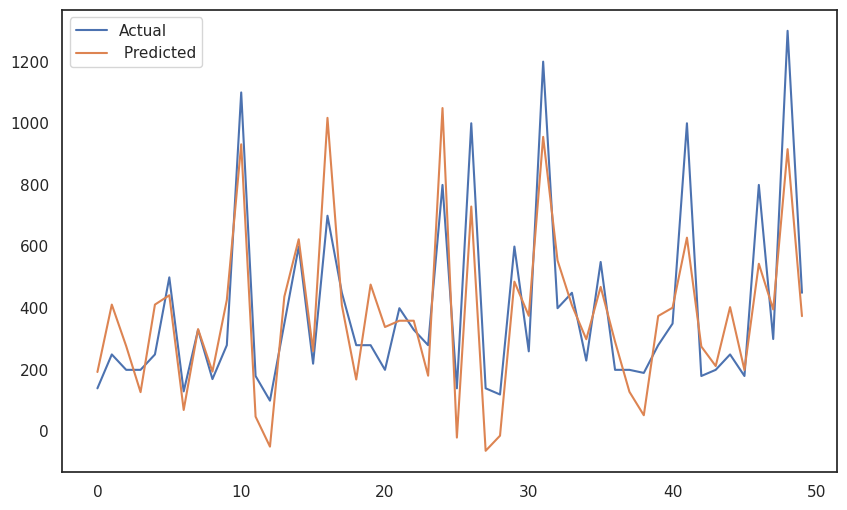

In [73]:
plt.figure(figsize= (10,6))
plt.plot(df3[:50])
plt.legend(["Actual" , " Predicted"])

In [74]:
import statsmodels.api as sm

In [75]:
x2 = sm.add_constant(x)
est = sm.OLS(y , x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     203.2
Date:                Sun, 20 Aug 2023   Prob (F-statistic):          2.25e-104
Time:                        22:31:19   Log-Likelihood:                -2470.1
No. Observations:                 381   AIC:                             4952.
Df Residuals:                     375   BIC:                             4976.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        430.0055     57.243      7.512      0.0

In [76]:
print(est2.rsquared_adj)

0.7267854160911364


## Ridg regression

In [77]:
from sklearn.linear_model import RidgeCV

In [78]:
rid = RidgeCV(alphas = 0.5)

In [79]:
rid.fit(x_train,y_train)

RidgeCV(alphas=0.5)

In [80]:
rid.score(x_train,y_train)

0.7234329630136754

In [81]:
rid.score(x_test , y_test)

0.7380552645935342

## Lasso Regression

In [82]:
from sklearn.linear_model import LassoLars


In [83]:
rid = LassoLars()
scaler = StandardScaler()
y = df['Price ($)']
x = df.drop('Price ($)', axis=1)

x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [84]:
rid.fit(x_train,y_train)

LassoLars()

In [85]:
rid.score(x_train,y_train)

0.7234020899085593

In [86]:
rid.score(x_test , y_test)

0.7377369972031491